In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
import os
from os import listdir
import string
from sklearn.model_selection import train_test_split

In [ ]:
data_path = '/content/data/'
images = []
symbols = string.ascii_lowercase + "0123456789"
texts = np.zeros((5, 1070, len(symbols)))

image_paths = []
for img in os.listdir(data_path):
  image_paths.append(img)


#tf.random.shuffle(image_paths, seed = 34)

i = 0
for img in image_paths:
  #plt.figure()
  image = cv2.imread((data_path +img), cv2.IMREAD_GRAYSCALE)
  #imgplot = plt.imshow(image, cmap=plt.get_cmap('gray'))
  images.append(image)
  text = img.split('.')[0]
  
  encoded_text = np.zeros((5, len(symbols)))
  #   [dog, cat, bike]
  #cat: [0, 1, 0]
  #   [a, b, c, ...]
  #c: [0, 0, 1, ...]
  for j, l in enumerate(text):
      index = symbols.find(l)
      encoded_text[j, index] = 1
  texts[:, i] = encoded_text
  i+=1

images = np.array(images)
print(images.shape)
images = images/255

xtrain, ytrain = images[:970], texts[:, :970]
xtest, ytest = images[970:], texts[:, 970:]
print(texts.shape)

(1070, 50, 200)
(5, 1070, 36)


In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(images, texts[:], test_size = 0.1, random_state = 34)
# ytrain = np.array(ytrain)
# ytest = np.array(ytest)
# ytrain = ytrain.astype('float32')
# ytest = ytest.astype('float32')
# ytrain.shape

In [ ]:
layers = tf.keras.layers


img = layers.Input(shape=(50, 200, 1)) 
conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
mp1 = layers.MaxPooling2D(padding='same')(conv1)  
conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
mp2 = layers.MaxPooling2D(padding='same')(conv2)  
conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
bn = layers.BatchNormalization()(conv3)
mp3 = layers.MaxPooling2D(padding='same')(bn)  
flat = layers.Flatten()(mp3)
outs = []
for _ in range(5):
    dens1 = layers.Dense(64, activation='relu')(flat)
    drop = layers.Dropout(0.5)(dens1)
    res = layers.Dense(len(symbols), activation='sigmoid')(drop)

    outs.append(res)
model = tf.keras.models.Model(img, outs)
model.summary()
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
model.fit(xtrain, [ytrain[0], ytrain[1], ytrain[2], ytrain[3], ytrain[4]], epochs = 10, batch_size=32)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 50, 200, 16)  160         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [ ]:
score= model.evaluate(xtest,[ytest[0], ytest[1], ytest[2], ytest[3], ytest[4]],verbose=1)
print('Test Loss and accuracy:', score)

4/4 [==============================] - 1s 59ms/step - loss: 15.5046 - dense_21_loss: 2.8939 - dense_23_loss: 3.0917 - dense_25_loss: 3.1136 - dense_27_loss: 3.2509 - dense_29_loss: 3.1545 - dense_21_accuracy: 0.6800 - dense_23_accuracy: 0.4800 - dense_25_accuracy: 0.3600 - dense_27_accuracy: 0.2100 - dense_29_accuracy: 0.3000
Test Loss and accuracy: [15.504599571228027, 2.8938820362091064, 3.0917437076568604, 3.1135637760162354, 3.250908851623535, 3.154500722885132, 0.6800000071525574, 0.47999998927116394, 0.36000001430511475, 0.20999999344348907, 0.30000001192092896]


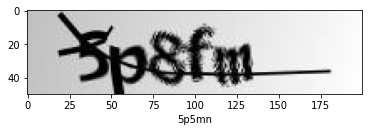

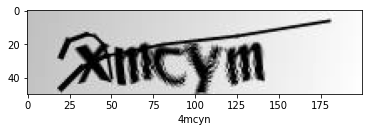

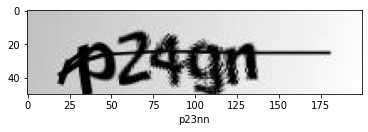

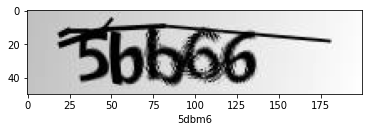

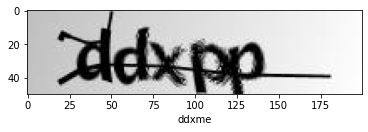

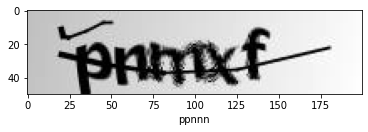

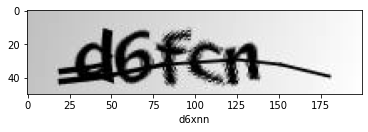

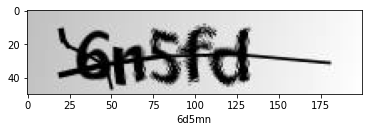

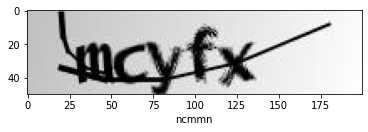

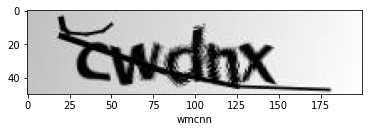

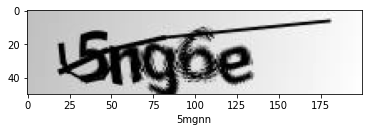

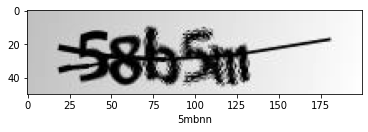

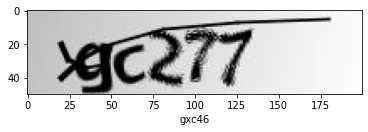

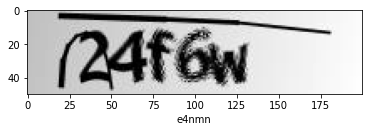

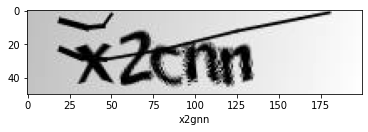

In [ ]:
for x in range(15):
  image = xtest[x]
  res = np.array(model.predict(image[np.newaxis, :, :, np.newaxis]))
  ans = np.reshape(res, (5, 36))
  l_ind = []
  probs = []
  for a in ans:
      l_ind.append(np.argmax(a))
  capt = ''
  for l in l_ind:
      capt += symbols[l]
  plt.figure()
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.xlabel(capt)